In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np

In [ ]:
#scrape jumlah ulasan yang diinginkan
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.gojek.app',
    lang='id',  #disini kita mau men scrape data ulasan aplikasi shopee yang berada di google play store
    country='id', #kita setting bahasa nya menjadi bahasa indonesia
    sort=Sort.MOST_RELEVANT, # # kemudian kita gunakan most_relevan untuk mendapatkan ulasan yang paling relevant
    count=5000, # disini jumlah ulasan yang mau kita ambil ada seribu
    filter_score_with=None # # kemudian di filter_score kita gunakan None untuk mengambil semua score atau ratting bintang 1 sampai 5
)

In [ ]:
df_busu = pd.DataFrame(np.array(result),columns=['review'])
df_busu = df_busu.join(pd.DataFrame(df_busu.pop('review').tolist()))
df_busu.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,4f928d88-3ff9-4771-90b6-6bbcf67492a8,Farqy Noordien,https://play-lh.googleusercontent.com/a-/ALV-U...,Layanan food tidak memberi info map driver di ...,1,313,4.77.2,2023-11-04 15:10:52,"Hai Kak Farqy Noordien, mohon maaf atas ketida...",2023-10-22 10:39:46,4.77.2
1,068821b9-f1da-4f8a-9612-24a3186dde51,Amri Jnt,https://play-lh.googleusercontent.com/a-/ALV-U...,1. Ketika driver Gocar melakukan panggilan tid...,1,69,4.78.3,2023-11-15 07:00:32,"Mohon maaf atas ketidaknyamanannya, Kak Amri. ...",2023-11-15 07:37:27,4.78.3
2,7052b9ac-0dc9-420d-8af0-b750fa6c323c,Felix Tumale,https://play-lh.googleusercontent.com/a-/ALV-U...,Aplikasinya akhir-akhir ini bermasalah. (1) lo...,1,142,4.78.3,2023-11-12 03:56:28,"Hai Kak Felix, mohon maaf atas ketidaknyamanan...",2023-11-12 05:05:02,4.78.3
3,f586034b-0f08-43c6-b630-ef78a8cbda50,SYARIF DPLK,https://play-lh.googleusercontent.com/a/ACg8oc...,Aplikasinya akhir-akhir ini bermasalah.(1) loa...,1,136,4.78.2,2023-11-10 03:01:27,"Hai Kak Syarif, mohon maaf atas ketidaknyamana...",2023-11-10 04:07:10,4.78.2
4,72ddbd71-40d5-479a-a5aa-d0a5971bcf1d,Ikanova Tusya,https://play-lh.googleusercontent.com/a/ACg8oc...,"Ada apa ya dengan gopay later saya, pdhal sebe...",1,9,4.78.3,2023-11-16 11:25:47,"Hai Kak Ikanova, mohon maaf atas ketidaknyaman...",2023-11-16 13:12:09,4.78.3


In [ ]:
df_busu.shape

(5000, 11)

In [ ]:
#Run This Code to Sort the Data By Date

new_df = df_busu[['userName', 'score','at', 'content']]
sorted_df = new_df.sort_values(by='at', ascending=False) #Sort by Newst, change to True if you want to sort by Oldest.
sorted_df.head()

,userName,score,at,content
1429,Engkom Komalasari,4,2023-11-18 13:08:35,Semoga untuk pengiriman paket by go-send ada s...
567,Raya Mawar,2,2023-11-18 13:06:09,Sudah kapok pakai Gojek.... Cukup ini yg terak...
3480,Mufakir CHN,5,2023-11-18 12:39:35,Sangat membantu dalam aktifitas sehari hari
1071,Tri Feri,5,2023-11-18 12:38:40,"Sangat membantu promo promonya, sayang promo g..."
77,Prameswuri Anneke,2,2023-11-18 12:32:38,maps gojek abis di update kok jadi jelek sih? ...


In [ ]:
my_df=sorted_df[['content', 'score']]
#karena kita hanya membutuhkan kolom content dan score maka kita lakukan filter kolom lgi hingga menyisakan kolom content dan score.

In [ ]:
print(my_df)

                                                content  score
1429  Semoga untuk pengiriman paket by go-send ada s...      4
567   Sudah kapok pakai Gojek.... Cukup ini yg terak...      2
3480        Sangat membantu dalam aktifitas sehari hari      5
1071  Sangat membantu promo promonya, sayang promo g...      5
77    maps gojek abis di update kok jadi jelek sih? ...      2
...                                                 ...    ...
3585  Kadang ongkir tidak sesuai dengan harga saat p...      2
4048  Bagus sih, tapi jujur aja , yg spin tokennya a...      3
3637  Sebelumnya saya suka sekali dengan aplikasi go...      5
3655  Setelah saya update. Malah sekarang saya gabis...      1
3734  Pemberian promo kepada customer tidak jelas......      3

[5000 rows x 2 columns]


In [ ]:
def pelabelan(score):
  if score < 3:
    return 'Negatif'
  elif score == 3 :
    return 'Netral'
  elif score > 3 :
    return 'Positif'
my_df['Label'] = my_df ['score'].apply(pelabelan)
my_df.head(50)

<ipython-input-8-674b4ca6ef3f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df['Label'] = my_df ['score'].apply(pelabelan)


,content,score,Label
1429,Semoga untuk pengiriman paket by go-send ada s...,4,Positif
567,Sudah kapok pakai Gojek.... Cukup ini yg terak...,2,Negatif
3480,Sangat membantu dalam aktifitas sehari hari,5,Positif
1071,"Sangat membantu promo promonya, sayang promo g...",5,Positif
77,maps gojek abis di update kok jadi jelek sih? ...,2,Negatif
3262,Pesen gofood skrg jadi lama harus tunggu dapat...,3,Netral
3235,katanya dapat hadiah 50000 masuk saldo gopay t...,1,Negatif
987,Kebijalan gopay later setelah migrasi ke mab s...,1,Negatif
58,"Aplikasi yang penuh dengan lag, jaringan bagus...",1,Negatif
3312,ngasih limit gopaylater tapi ga bisa dipake,2,Negatif


In [ ]:
my_df.to_excel("scrapping_data_gojek.xlsx", index = False)  #kemudian save menjadi file csv

In [ ]:
!pip install nltk
!pip install sastrawi
!pip install emoji

In [ ]:
import pandas as pd
import nltk
import re
import string
import emoji
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt');

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Inisialisasi stemmer Sastrawi
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Load data from Excel file
file_path = 'scrapping_data_gojek.xlsx'
my_df = pd.read_excel(file_path)

In [ ]:
# Proses Cleaning
def remove_kata(comment):
  comment = comment.replace('\t', ' ').replace('\n', ' ').replace('\\u', ' ').replace('\\', '')
  comment = comment.encode('ascii', 'replace').decode('ascii')
  comment = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/S+)", " ", comment).split())
  return comment.replace("http://", " ").replace("https://", " ")
my_df['content'] = my_df['content'].apply(remove_kata)
def remove_angka(comment):
    return re.sub(r"\d+", " ", comment)
my_df['content'] = my_df['content'].apply(remove_angka)
def remove_punctuation(comment):
    return comment.translate(str.maketrans("", "", string.punctuation))
my_df['content'] = my_df['content'].apply(remove_punctuation)
def remove_whitespace_LT(comment):
    return comment.strip()
my_df['content'] = my_df['content'].apply(remove_whitespace_LT)
def remove_whitespace_multiple(comment):
    return re.sub('\s+', ' ', comment)
my_df['content'] = my_df['content'].apply(remove_whitespace_multiple)
def remove_single_char(comment):
    return re.sub(r"\b[a-zA-Z]\b", " ", comment)
my_df['content'] = my_df['content'].apply(remove_single_char)
print('Hasil Cleaning: \n')
print(my_df.head(50))

Hasil Cleaning: 

                                              content  score    Label
0   Semoga untuk pengiriman paket by gosend ada si...      4  Positif
1   Sudah kapok pakai Gojek Cukup ini yg terakhir ...      2  Negatif
2         Sangat membantu dalam aktifitas sehari hari      5  Positif
3   Sangat membantu promo promonya sayang promo go...      5  Positif
4   maps gojek abis di update kok jadi jelek sih p...      2  Negatif
5   Pesen gofood skrg jadi lama harus tunggu dapat...      3   Netral
6   katanya dapat hadiah masuk saldo gopay tapi ti...      1  Negatif
7   Kebijalan gopay later setelah migrasi ke mab s...      1  Negatif
8   Aplikasi yang penuh dengan lag jaringan bagus ...      1  Negatif
9         ngasih limit gopaylater tapi ga bisa dipake      2  Negatif
10  Di map posisi nya deket aslinya msh jauh makan...      3   Netral
11  Kok pelayanan aplikasi Tokopedia dan go jek se...      1  Negatif
12  Apk apa ini saldo saya di sedot sampe   padaha...      1  Negatif
13

In [ ]:
# Proses Case Folding

import re
import pandas as pd
def casefolding(comment):
    comment = comment.lower()
    comment = comment.strip()
    return comment
my_df['content'] = my_df['content'].apply(casefolding)
print('Hasil Case Folding: \n')
print(my_df.head(50))

Hasil Case Folding: 

                                              content  score    Label
0   semoga untuk pengiriman paket by gosend ada si...      4  Positif
1   sudah kapok pakai gojek cukup ini yg terakhir ...      2  Negatif
2         sangat membantu dalam aktifitas sehari hari      5  Positif
3   sangat membantu promo promonya sayang promo go...      5  Positif
4   maps gojek abis di update kok jadi jelek sih p...      2  Negatif
5   pesen gofood skrg jadi lama harus tunggu dapat...      3   Netral
6   katanya dapat hadiah masuk saldo gopay tapi ti...      1  Negatif
7   kebijalan gopay later setelah migrasi ke mab s...      1  Negatif
8   aplikasi yang penuh dengan lag jaringan bagus ...      1  Negatif
9         ngasih limit gopaylater tapi ga bisa dipake      2  Negatif
10  di map posisi nya deket aslinya msh jauh makan...      3   Netral
11  kok pelayanan aplikasi tokopedia dan go jek se...      1  Negatif
12  apk apa ini saldo saya di sedot sampe   padaha...      1  Negati

In [ ]:
my_df.to_excel('cleaning_gojek.xlsx', index=False)

data_fold = pd.read_excel('cleaning_gojek.xlsx')
print(data_fold.shape)
print(data_fold.head())

(5000, 3)
                                             content  score    Label
0  semoga untuk pengiriman paket by gosend ada si...      4  Positif
1  sudah kapok pakai gojek cukup ini yg terakhir ...      2  Negatif
2        sangat membantu dalam aktifitas sehari hari      5  Positif
3  sangat membantu promo promonya sayang promo go...      5  Positif
4  maps gojek abis di update kok jadi jelek sih p...      2  Negatif


In [ ]:
import string
import re

from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

In [ ]:
# Proses Tokenizing

import nltk
nltk.download('punkt')

def word_tokenize_wrapper(comment):
  return word_tokenize(comment)

my_df['content'] = my_df['content'].apply(word_tokenize_wrapper)

print('Hasil Tokenizing: \n')
print(my_df.head(20))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Hasil Tokenizing: 

                                              content  score    Label
0   [semoga, untuk, pengiriman, paket, by, gosend,...      4  Positif
1   [sudah, kapok, pakai, gojek, cukup, ini, yg, t...      2  Negatif
2   [sangat, membantu, dalam, aktifitas, sehari, h...      5  Positif
3   [sangat, membantu, promo, promonya, sayang, pr...      5  Positif
4   [maps, gojek, abis, di, update, kok, jadi, jel...      2  Negatif
5   [pesen, gofood, skrg, jadi, lama, harus, tungg...      3   Netral
6   [katanya, dapat, hadiah, masuk, saldo, gopay, ...      1  Negatif
7   [kebijalan, gopay, later, setelah, migrasi, ke...      1  Negatif
8   [aplikasi, yang, penuh, dengan, lag, jaringan,...      1  Negatif
9   [ngasih, limit, gopaylater, tapi, ga, bisa, di...      2  Negatif
10  [di, map, posisi, nya, deket, aslinya, msh, ja...      3   Netral
11  [kok, pelayanan, aplikasi, tokopedia, dan, go,...      1  Negatif
12  [apk, apa, ini, saldo, saya, di, sedot, sampe,...      1  Negatif


In [ ]:
my_df.to_excel('tokenizing_gojek.xlsx', index=False)


data_token = pd.read_excel("tokenizing_gojek.xlsx")
print(data_token.shape)
print(data_token.head())

(5000, 3)
                                             content  score    Label
0  ['semoga', 'untuk', 'pengiriman', 'paket', 'by...      4  Positif
1  ['sudah', 'kapok', 'pakai', 'gojek', 'cukup', ...      2  Negatif
2  ['sangat', 'membantu', 'dalam', 'aktifitas', '...      5  Positif
3  ['sangat', 'membantu', 'promo', 'promonya', 's...      5  Positif
4  ['maps', 'gojek', 'abis', 'di', 'update', 'kok...      2  Negatif


In [ ]:
# Proses Filtering/Stopword Removal

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

list_stopwords = stopwords.words('indonesian')

list_stopwords.extend(['yg', 'dg', 'rt', 'dgn', 'ny', 'anj', 'klo',
                       'kalo', 'amp', 'biar', 'bikin', 'bilang',
                       'gak', 'ga', 'krn', 'nya', 'nih', 'sih',
                       'si', 'tau', 'tdk', 'tuh', 'utk', 'ya',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt',
                       '&amp', 'yah', 'jgn', 'ga', 'ok', 'bgt', 'banget', 'jg',
                       'gw','guys','gtu','fyi',
                       'iya','aja','sih','iyaa','tpi','udh','ga','ngga','nggak'
                       ,'yeeha','itu','ituu','tpi','giniii','kaan','pas',
                       'jd', 'jgn', 'sdh', 'aja', 'n', 't',
                       'nyg', 'hehe', 'pen', 'u', 'nyesel', 'habis','download','iyaah',
                       'nanya','yaa','tcodtaf','ccq','google','yo','gada','gue','udah','blm','cakep','beneran','dah',
                       'sender','baru','lagi','maen','tbtb','woy','lagi','lg','lgi','njir','kocak','wkwk','naseh','nan',
                       'tcok','cok','nntn','sengaja','bru',
                        ])

list_stopwords = set(list_stopwords)

def stopword_removal(comment):
    return [word for word in comment if word not in list_stopwords]

my_df['content'] = my_df['content'].apply(stopword_removal)
print('Hasil Filtering: \n')
print(my_df.head(30))

Hasil Filtering: 

                                              content  score    Label
0   [semoga, pengiriman, paket, by, gosend, sisite...      4  Positif
1   [kapok, pakai, gojek, kalinya, pindah, aplikas...      2  Negatif
2                       [membantu, aktifitas, sehari]      5  Positif
3   [membantu, promo, promonya, sayang, promo, gom...      5  Positif
4   [maps, gojek, abis, update, jelek, posisi, dri...      2  Negatif
5   [pesen, gofood, skrg, tunggu, driver, driver, ...      3   Netral
6                 [hadiah, masuk, saldo, gopay, aneh]      1  Negatif
7   [kebijalan, gopay, later, migrasi, mab, merugi...      1  Negatif
8   [aplikasi, penuh, lag, jaringan, bagus, koneks...      1  Negatif
9                 [ngasih, limit, gopaylater, dipake]      2  Negatif
10  [map, posisi, deket, aslinya, msh, kasih, bint...      3   Netral
11  [pelayanan, aplikasi, tokopedia, go, jek, jele...      1  Negatif
12  [apk, saldo, sedot, sampe, butuh, uang, lapori...      1  Negatif
1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
my_df.to_excel('stopword_gojek.xlsx', index=False)

data_filter = pd.read_excel("stopword_gojek.xlsx")
print(data_filter.shape)
print(data_filter.head())

(5000, 3)
                                             content  score    Label
0  ['semoga', 'pengiriman', 'paket', 'by', 'gosen...      4  Positif
1  ['kapok', 'pakai', 'gojek', 'kalinya', 'pindah...      2  Negatif
2                ['membantu', 'aktifitas', 'sehari']      5  Positif
3  ['membantu', 'promo', 'promonya', 'sayang', 'p...      5  Positif
4  ['maps', 'gojek', 'abis', 'update', 'jelek', '...      2  Negatif


In [ ]:
# Proses Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(document):
    return [stemmer.stem(term) for term in document]

my_df['content'] = my_df['content'].apply(stemming)
print(my_df['content'].head())

0    [moga, kirim, paket, by, gosend, sisitem, baya...
1    [kapok, pakai, gojek, kali, pindah, aplikasi, ...
2                             [bantu, aktifitas, hari]
3    [bantu, promo, promonya, sayang, promo, gomart...
4    [maps, gojek, abis, update, jelek, posisi, dri...
Name: content, dtype: object


In [ ]:
my_df.to_excel('final_gojek.xlsx', index=False)

datafinal = pd.read_excel("final_gojek.xlsx")
print(datafinal.shape)
print(datafinal.head())

(5000, 3)
                                             content  score    Label
0  ['moga', 'kirim', 'paket', 'by', 'gosend', 'si...      4  Positif
1  ['kapok', 'pakai', 'gojek', 'kali', 'pindah', ...      2  Negatif
2                     ['bantu', 'aktifitas', 'hari']      5  Positif
3  ['bantu', 'promo', 'promonya', 'sayang', 'prom...      5  Positif
4  ['maps', 'gojek', 'abis', 'update', 'jelek', '...      2  Negatif


In [ ]:
# Proses TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

datafinal = pd.read_excel("final_gojek.xlsx")
datafinal = datafinal.astype({'Label': 'category', 'content': 'string', 'score': 'int'})

tf = TfidfVectorizer()

text_tf = tf.fit_transform(datafinal['content'].astype('U'))

result = pd.DataFrame(text_tf.toarray(), columns=tf.get_feature_names_out()).join(datafinal['Label'])

print(result)

      aaaah  aamiin  aannccuurrrrrrrrrrrrrrbad  abadpadahal  abaikandi  abal  \
0       0.0     0.0                        0.0          0.0        0.0   0.0   
1       0.0     0.0                        0.0          0.0        0.0   0.0   
2       0.0     0.0                        0.0          0.0        0.0   0.0   
3       0.0     0.0                        0.0          0.0        0.0   0.0   
4       0.0     0.0                        0.0          0.0        0.0   0.0   
...     ...     ...                        ...          ...        ...   ...   
4995    0.0     0.0                        0.0          0.0        0.0   0.0   
4996    0.0     0.0                        0.0          0.0        0.0   0.0   
4997    0.0     0.0                        0.0          0.0        0.0   0.0   
4998    0.0     0.0                        0.0          0.0        0.0   0.0   
4999    0.0     0.0                        0.0          0.0        0.0   0.0   

      abang  abangabang  abdet  abg  ..

In [ ]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer

# Membaca data dari file Excel
datafinal = pd.read_excel("final_gojek.xlsx")

# Memisahkan fitur dan label
X = datafinal['content']
y = datafinal['Label']

# Pembagian data 70:30 untuk pembelajaran dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mengubah teks menjadi vektor fitur
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Algoritma Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Algoritma Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
y_pred_rf = rf.predict(X_test_vec)

# Mengukur kinerja Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb, average='weighted')
recall_nb = recall_score(y_test, y_pred_nb, average='weighted')
f1_nb = f1_score(y_test, y_pred_nb, average='weighted')

# Mengukur kinerja Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Menampilkan hasil kinerja Naive Bayes
print("Naive Bayes:")
print("Akurasi (80:20):", accuracy_nb)
print("Presisi (80:20):", precision_nb)
print("Recall (80:20):", recall_nb)
print("F1 Score (80:20):", f1_nb)

# Menampilkan hasil kinerja Random Forest
print("\nRandom Forest:")
print("Akurasi (80:20):", accuracy_rf)
print("Presisi (80:20):", precision_rf)
print("Recall (80:20):", recall_rf)
print("F1 Score (80:20):", f1_rf)


Naive Bayes:
Akurasi (80:20): 0.785
Presisi (80:20): 0.7645818959162614
Recall (80:20): 0.785
F1 Score (80:20): 0.7516890497153785

Random Forest:
Akurasi (80:20): 0.78
Presisi (80:20): 0.7968232272852686
Recall (80:20): 0.78
F1 Score (80:20): 0.7482856188643494


# Visualisasi

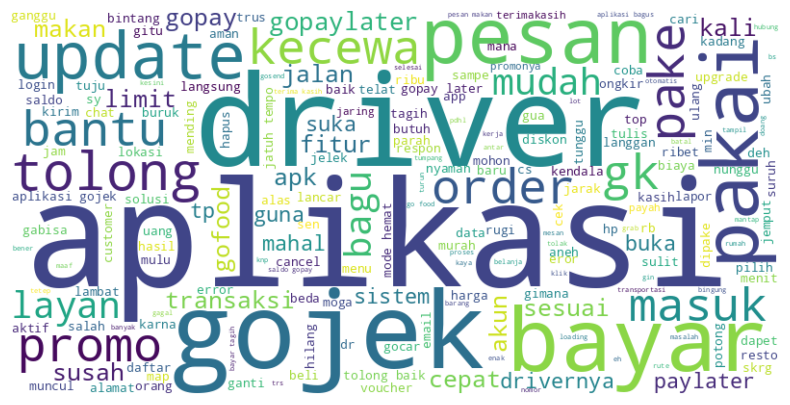

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(' '.join(map(str, content)) for content in my_df['content'])

# Buat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud dengan matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

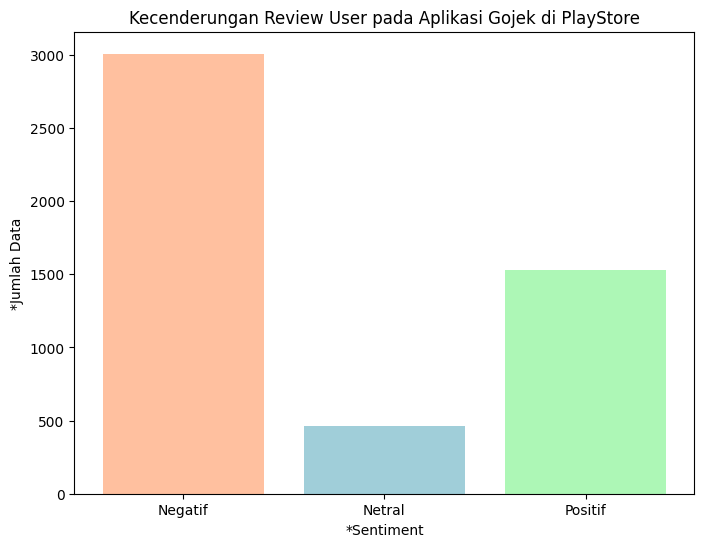

{'Negatif': 3007, 'Netral': 461, 'Positif': 1532}


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat array dengan jumlah unik target dan jumlah data untuk masing-masing target
unique_targets, target_counts = np.unique(y, return_counts=True)

# Membuat plot batang untuk menampilkan banyaknya data untuk tiap target
plt.figure(figsize=(8, 6))
colors = {'Negatif': '#ffc09f', 'Netral': '#a0ced9', 'Positif': '#adf7b6'}
plt.bar(unique_targets, target_counts, color=[colors[Label]for Label in unique_targets])
plt.xlabel('*Sentiment')
plt.ylabel('*Jumlah Data')
plt.title('Kecenderungan Review User pada Aplikasi Gojek di PlayStore')
plt.show()

unique_targets, target_counts = np.unique(y, return_counts=True)
print(dict(zip(unique_targets, target_counts)))